# ATMS 305 : March 8, 2017
Data visualization using xarray and matplotlib
---

In the last exercise, you learned how to use `matplotlib` to visualize data.  In this exercise, we will put it all together: 
- read files
- subset files using fancy indexing
- plot the results

We're going to use a new python package called `xarray`.  It is a high level interface for netCDF file reading and writing, that will make your life easier.  Let's go!  

In [1]:
%pylab inline
import xarray as xr

Populating the interactive namespace from numpy and matplotlib



Did you get this this error?
```
---------------------------------------------------------------------------
ImportError                               Traceback (most recent call last)
<ipython-input-2-c53dcc25b060> in <module>()
----> 1 import xarray

ImportError: No module named xarray
```

Phooey!  What do we do now?

Well, we can install a new package using `pip`, the python package manager.  Many packages can be installed in this way.

Open a terminal and enter

```
pip install xarray --user --upgrade
```

When it is done, **restart the kernel** and try again.



In [2]:
import xarray as xr

Ahhhhhhhh....all better.  Let's get to work!

## Using xarray to read a netCDF file

It can't be much easier than this...xarray handles a lot of the dirty work for you.  We can load both local files, as well as files on the internet.  Either give the local file path, or the web site!

In [3]:
nc=xr.open_dataset('https://www.esrl.noaa.gov/psd/thredds/dodsC/Datasets/gistemp/combined/250km/air.2x2.250.mon.anom.comb.nc')
nc

<xarray.Dataset>
Dimensions:  (lat: 90, lon: 180, time: 1645)
Coordinates:
  * lat      (lat) float32 89.0 87.0 85.0 83.0 81.0 79.0 77.0 75.0 73.0 71.0 ...
  * lon      (lon) float32 1.0 3.0 5.0 7.0 9.0 11.0 13.0 15.0 17.0 19.0 21.0 ...
  * time     (time) datetime64[ns] 1880-01-01 1880-02-01 1880-03-01 ...
Data variables:
    air      (time, lat, lon) float64 ...
Attributes:
    title: GISS Surface Temperature Analysis (GISTEMP): 250km smoothing combined land/ocean
    comments: This is the 250km smoothed combined land,ocean version of the dataset on a 2x2 grid. SST dataset used at NASA is now ERSST
    platform: Analysis
    Source: http://data.giss.nasa.gov/gistemp/ source and http://data.giss.nasa.gov/pub/gistemp/ data
    Documentation: http://www.esrl.noaa.gov/psd/data/gridded/data.gistemp.html
    references: http://www.esrl.noaa.gov/psd/data/gridded/data.gistemp.html
    Conventions: COARDS
    history: created at PSD Jun 2009 by CAS. Converted to chunked, deflated non-packed N

In [4]:
ncvar = nc['air']
ncvar

<xarray.DataArray 'air' (time: 1645, lat: 90, lon: 180)>
[26649000 values with dtype=float64]
Coordinates:
  * lat      (lat) float32 89.0 87.0 85.0 83.0 81.0 79.0 77.0 75.0 73.0 71.0 ...
  * lon      (lon) float32 1.0 3.0 5.0 7.0 9.0 11.0 13.0 15.0 17.0 19.0 21.0 ...
  * time     (time) datetime64[ns] 1880-01-01 1880-02-01 1880-03-01 ...
Attributes:
    long_name: Monthly Average Temperature Anomalies
    valid_range: [-25.  25.]
    units: degC
    precision: 2
    var_desc: Air Temperature: 250km smoothing combined
    dataset: GISS Surface Temperature Analysis (GISTEMP)
    level_desc: Surface
    statistic: Anomaly
    parent_stat: Individual obs
    cell_methods: time: anomaly (monthly from values)
    standard_name: air_temperature_anomaly
    actual_range: [  -20.74464989  9999.        ]
    _ChunkSize: [  1  90 180]

This data is a gridded time series at 2 degree resolution of monthly surface temperature anomalies starting in 1880.  Let's average over all space dimensions (lat - axis 1, and lon - axis 2).  We can use `np.mean` and its `axis` keyword (very handy) for this purpose.

This will yield a time series of globally averaged temperature!

Populating the interactive namespace from numpy and matplotlib


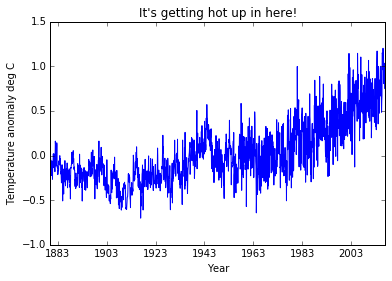

In [5]:
%pylab inline

plt.plot(ncvar.time,np.mean(ncvar,axis=(1,2)))
plt.xlabel('Year')
plt.ylabel('Temperature anomaly deg C')
plt.title("It's getting hot up in here!")

We can use the select tool to get a subset in a box (find closest index values of lon and lat) so that we can subset the data and grab the closest point to Champaign-Urbana.  We can give it a list of points.  Here we will give it one.

In [5]:
nc_cmi=nc.sel(lon=-88.9+360.,lat=40., method='nearest')
nc_cmi

<xarray.Dataset>
Dimensions:  (time: 1645)
Coordinates:
    lat      float32 41.0
    lon      float32 271.0
  * time     (time) datetime64[ns] 1880-01-01 1880-02-01 1880-03-01 ...
Data variables:
    air      (time) float64 ...
Attributes:
    title: GISS Surface Temperature Analysis (GISTEMP): 250km smoothing combined land/ocean
    comments: This is the 250km smoothed combined land,ocean version of the dataset on a 2x2 grid. SST dataset used at NASA is now ERSST
    platform: Analysis
    Source: http://data.giss.nasa.gov/gistemp/ source and http://data.giss.nasa.gov/pub/gistemp/ data
    Documentation: http://www.esrl.noaa.gov/psd/data/gridded/data.gistemp.html
    references: http://www.esrl.noaa.gov/psd/data/gridded/data.gistemp.html
    Conventions: COARDS
    history: created at PSD Jun 2009 by CAS. Converted to chunked, deflated non-packed NetCDF4 2014/06
    dataset_title: GISS Surface Temperature Analysis
    DODS_EXTRA.Unlimited_Dimension: time
    EXTRA_DIMENSION.nbnds: 2

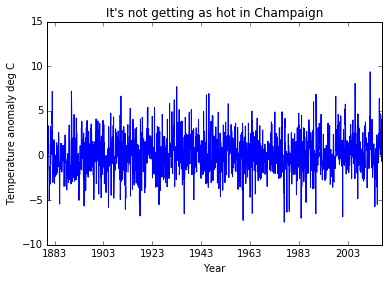

In [6]:
import numpy as np
import matplotlib.pyplot as plt

var='air'

plt.plot(nc_cmi.time,nc_cmi[var])
plt.xlabel('Year')
plt.ylabel('Temperature anomaly deg C')
plt.title("It's not getting as hot in Champaign")

## Saving to file - easy as np.pi()
Want to save the file as a netCDF file?  No problem!

In [ ]:
nc_cmi.to_netcdf('nc_cmi.nc')

## Calculating time averages

Let's say we want to average the monthly time series data into annually averaged data.

There are a number of ways to do this.  `xarray` offers time sampling capabilities, similar to `pandas`.  First though, let's do it the hard way.

In [7]:
nc_cmi

<xarray.Dataset>
Dimensions:  (time: 1645)
Coordinates:
    lat      float32 41.0
    lon      float32 271.0
  * time     (time) datetime64[ns] 1880-01-01 1880-02-01 1880-03-01 ...
Data variables:
    air      (time) float64 10.02 4.389 0.8811 0.5576 3.356 1.193 0.2533 ...
Attributes:
    title: GISS Surface Temperature Analysis (GISTEMP): 250km smoothing combined land/ocean
    comments: This is the 250km smoothed combined land,ocean version of the dataset on a 2x2 grid. SST dataset used at NASA is now ERSST
    platform: Analysis
    Source: http://data.giss.nasa.gov/gistemp/ source and http://data.giss.nasa.gov/pub/gistemp/ data
    Documentation: http://www.esrl.noaa.gov/psd/data/gridded/data.gistemp.html
    references: http://www.esrl.noaa.gov/psd/data/gridded/data.gistemp.html
    Conventions: COARDS
    history: created at PSD Jun 2009 by CAS. Converted to chunked, deflated non-packed NetCDF4 2014/06
    dataset_title: GISS Surface Temperature Analysis
    DODS_EXTRA.Unlimited_

In [8]:
# How many years do we have?

ntimes=np.shape(nc_cmi['time'])
print(ntimes[0]/12.)

137.08333333333334


It looks like we don't have an evenly divisible number of months, so we don't have complete years.
Let's start at the beginning and loop by 12.

In [9]:
nyears=np.floor(ntimes[0]/12.)
averages=np.zeros(nyears)

for i in np.arange(nyears):
    averages[i]=np.mean(nc_cmi[var][i*12:(i+1)*12-1])

/projects/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:2: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  from ipykernel import kernelapp as app
/projects/anaconda3/lib/python3.5/site-packages/pandas/tseries/base.py:276: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  result = getitem(key)
/projects/5aeec648-46ad-40c6-af03-9a8215dee00d/.local/lib/python3.5/site-packages/xarray/core/indexing.py:410: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  return self._ensure_ndarray(self.array[key])
/projects/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:5: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


Save time series to a new file, just Champaign.

In [10]:
site='Champaign_annualavgs'

nc_cmi.to_netcdf(site+'_data.nc')

Read it back in to check!

In [12]:
nc_cmi2 = xr.open_dataset('Champaign_annualavgs_data.nc')
nc_cmi2

<xarray.Dataset>
Dimensions:  (time: 1645)
Coordinates:
    lat      float32 41.0
    lon      float32 271.0
  * time     (time) datetime64[ns] 1880-01-01 1880-02-01 1880-03-01 ...
Data variables:
    air      (time) float64 10.02 4.391 0.8828 0.5547 3.359 1.195 0.25 1.242 ...
Attributes:
    title: GISS Surface Temperature Analysis (GISTEMP): 250km smoothing combined land/ocean
    comments: This is the 250km smoothed combined land,ocean version of the dataset on a 2x2 grid. SST dataset used at NASA is now ERSST
    platform: Analysis
    Source: http://data.giss.nasa.gov/gistemp/ source and http://data.giss.nasa.gov/pub/gistemp/ data
    Documentation: http://www.esrl.noaa.gov/psd/data/gridded/data.gistemp.html
    references: http://www.esrl.noaa.gov/psd/data/gridded/data.gistemp.html
    Conventions: COARDS
    history: created at PSD Jun 2009 by CAS. Converted to chunked, deflated non-packed NetCDF4 2014/06
    dataset_title: GISS Surface Temperature Analysis
    DODS_EXTRA.Unlimi

Now the easy way.  We `xarray` and `pandas` share the same interface to resample and group time series conveniently.  The documentation is available at: http://xarray.pydata.org/en/stable/time-series.html#resampling-and-grouped-operations.  The codes for resampling are the same as `pandas`.  See http://pandas.pydata.org/pandas-docs/stable/timeseries.html#offset-aliases


In [13]:
nc_cmi3=nc_cmi.resample('AS', dim='time', how='mean')
nc_cmi3

<xarray.Dataset>
Dimensions:  (time: 138)
Coordinates:
  * time     (time) datetime64[ns] 1880-01-01 1881-01-01 1882-01-01 ...
Data variables:
    air      (time) float64 0.8747 0.503 0.7313 -1.04 -0.06189 -1.009 ...

How easy is that?  np.pi()?  You can also resample with other time frequencies, or in space, or change how you do the calculation (i.e., calculate the median instead of the mean).

Now save to a file:

In [ ]:
site='Champaign_annualavgs'

nc_cmi3.to_netcdf(site+'_data.nc')

Make a (nice) plot!

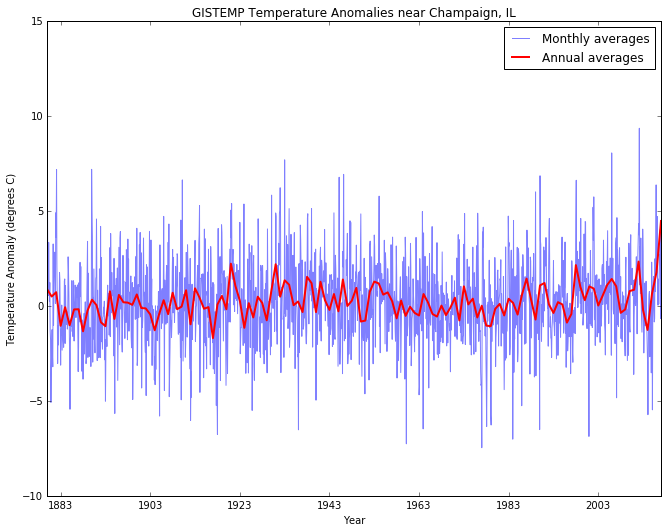

In [15]:
plt.figure(figsize=(11,8.5)) #create a new figure

plt.plot(nc_cmi['time'],np.squeeze(nc_cmi['air']),'b',alpha=0.5)
plt.plot(nc_cmi3['time'],np.squeeze(nc_cmi3['air']),'r',linewidth=2.0)
plt.legend(['Monthly averages','Annual averages'])
plt.xlabel('Year')
plt.ylabel('Temperature Anomaly (degrees C)')
plt.title('GISTEMP Temperature Anomalies near Champaign, IL')
plt.show()

## Introduction to mapping with `basemap`.

Python's `basemap` is a package that is designed to enable `matplotlib` handle geographic calculations and visualize maps with geographic boundaries.  All we need is an array with a 2-D variable, and associated latitudes and longitudes, and off we go.

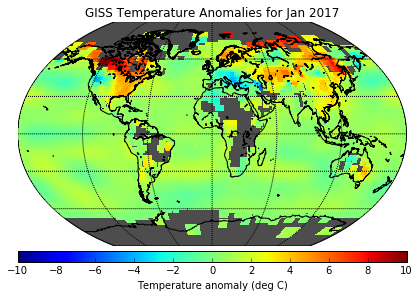

In [21]:
import pandas as pd
from mpl_toolkits.basemap import Basemap

#Select January 2017, make lats and lons 2D so basemap knows where to plot each point

jan2017 = nc.sel(time=pd.datetime(2017,1,1))

#Clean up data masking - this will maske where data is nan, and put the good values in there
data = np.ma.masked_where(np.isnan(jan2017['air'].values),jan2017['air'].values)

lons,lats=np.meshgrid(jan2017['lon'].values,jan2017['lat'].values)

# create figure, axes instances.
fig = plt.figure()
ax = fig.add_axes([0.05,0.05,0.9,0.9])
# create Basemap instance.
# coastlines not used, so resolution set to None to skip
# continent processing (this speeds things up a bit)
m = Basemap(projection='kav7',lon_0=0,resolution='l')
# draw line around map projection limb.
# color background of map projection region.
# missing values over land will show up this color.
m.drawmapboundary(fill_color='0.3')
# plot temperature with pcolor
im1 = m.pcolormesh(lons,lats,data,latlon=True,vmin=-10,vmax=10)
# draw parallels and meridians, but don't bother labelling them.
m.drawparallels(np.arange(-90.,99.,30.))
m.drawmeridians(np.arange(-180.,180.,60.))
#Add coastlines
m.drawcoastlines()
# add colorbar
cb = m.colorbar(im1,"bottom", size="5%", pad="2%")
cb.set_label('Temperature anomaly (deg C)')
# add a title.
ax.set_title('GISS Temperature Anomalies for Jan 2017')
plt.show()


Zoom in, use a different map projection.

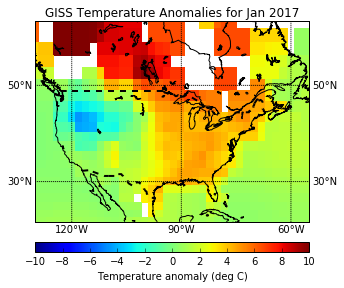

In [22]:
from mpl_toolkits.basemap import Basemap
import numpy as np
import matplotlib.pyplot as plt
# create new figure, axes instances.
fig=plt.figure()
ax=fig.add_axes([0.1,0.1,0.8,0.8])
# setup mercator map projection.
m = Basemap(llcrnrlon=-130.,llcrnrlat=20.,urcrnrlon=-55.,urcrnrlat=60.,\
            rsphere=(6378137.00,6356752.3142),\
            resolution='l',projection='merc',\
            lat_0=40.,lon_0=-20.,lat_ts=20.)
im1 = m.pcolormesh(lons,lats,data,latlon=True,vmin=-10,vmax=10)
m.drawcoastlines()
m.drawcountries(color='k',linewidth=2,linestyle='--')
# draw parallels
m.drawparallels(np.arange(10,90,20),labels=[1,1,0,1])
# draw meridians
m.drawmeridians(np.arange(-180,180,30),labels=[1,1,0,1])
cb = m.colorbar(im1,"bottom", size="5%", pad="10%")
cb.set_label('Temperature anomaly (deg C)')
ax.set_title('GISS Temperature Anomalies for Jan 2017')
plt.show()
